In [1]:
#############################################################
# Compile `main.cu` to `file.exe`
# Commented out because we don't want to run it all the time
#############################################################
!nvcc -w functions.cu main.cu -o file

functions.cu
tmpxft_000095a0_00000000-10_functions.cudafe1.cpp
main.cu
tmpxft_000095a0_00000000-14_main.cudafe1.cpp
   Creating library file.lib and object file.exp


In [1]:
#############################################################
# Load python dependencies
# If package cannot be resolved from pylance, reload the interpreter
#############################################################
import numpy as np
import matplotlib.pyplot as plt
import utils

# Generate detuning
todo: distribution functions
read into detuning.dat

In [5]:
#############################################################
# Generate and write detuning data to file
#############################################################
# Write 1D numpy array to file
detuning_values_1d = utils.gen_same_pop(20, 200)
print("Detuning data:", detuning_values_1d)
np.savetxt("Detuning.dat", detuning_values_1d, delimiter="\t")

# Example: write 2D numpy array to file
# values_2d = np.array([
#     [10.0, 20.0, 40.0],
#     [10.0, 20.0, 50.0],
#     [10.0, 20.0, 60.0]
# ])
# np.savetxt("values_2d.dat", values_2d, delimiter="\t")

Detuning data: [  0.53995921   0.89633383   1.45402621   2.30531639   3.5728385
   5.41373125   8.02166449  11.62545484  16.48300895  22.86962595
  31.06029185  41.30648824  53.8091154   68.69021537  85.96704092
 105.53240936 127.1450229  150.43246168 174.90794909 200.        ]


# Run simulation

To run a single system, use terminal: 

         k  n_tot theta,phi g gamma chi kap t_end t_num handle

file.exe 20 100000 0.5 0.0 1.6 0.0 0.0 160 0.5 600000 k20N5_0.5_0_kappa160

## Suggested file naming convention:
k{num_ens}N{order of magnitude of n_total}_{theta_phi}_{other params}

E.g., k5N5_1_0_kappa160

The below block of code is useful for running multiple jobs

In [2]:

#############################################################
# Run multiple jobs
#############################################################
# List of arguments for each run
runs = [
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 60000, "handle": "60000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 70000, "handle": "70000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 80000, "handle": "80000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 90000, "handle": "90000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 100000, "handle": "100000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 110000, "handle": "110000"}
]

for arg in runs:
    # Prepare run arguments
    num_ens = arg['num_ens']
    n_total = arg['n_total']
    theta_0 = arg['theta_0']
    phi_0 = arg['phi_0']
    coup_a_0 = arg['coup_a_0']
    gamma_a_0 = arg['gamma_a_0']
    chi_a_0 = arg['chi_a_0']
    kappa_c_0 = arg['kappa_c_0']
    t_max = arg['t_max']
    t_num = arg['t_num']
    handle = arg['handle']
    
    # Run simulation with muted stdout stderr, 1st line for WIN, 2nd for UNIX. To view progress, use terminal instead
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  >nul 2>&1
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  > /dev/null 2>&1
    
    # Construct the result data filenames based on the `handle`
    result_sz_filename = f"Result_Sz_{handle}.dat"
    result_coherences_filename = f"Result_coherences_real_{handle}.dat"
    result_photon_filename = f"Result_photon_{handle}.dat"
    result_time_filename = f"Result_time_{handle}.dat"
    
    result_sz = np.loadtxt(result_sz_filename, dtype=np.longdouble)
    result_time = np.loadtxt(result_time_filename, dtype=np.longdouble)
    detuning = np.loadtxt("Detuning.dat", dtype=np.longdouble)
    
    print(detuning)
    print(result_time)
    
    res = np.rot90(result_sz)
    print(result_sz)
    print(res)
        

NameError: name 'np' is not defined

# Analyze & Plot
todo:  import util functions return predict Td
write block to plot with Td and found Td

In [9]:
#############################################################
# Read in the results file
# Returns: 
#         [0]: time steps
#         [1]: sz
#         [2]: coherence
#         [3]: photons
#############################################################
results = utils.read_results("k20N4_0.5_kappa100") # Input: file handle
detuning_values_1d = np.loadtxt("Detuning.dat")

Text(0, 0.5, '$\\langle a^\\dagger a\\rangle$')

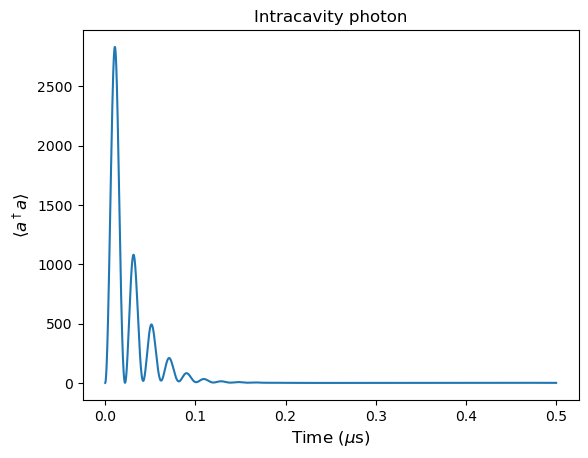

In [10]:
#############################################################
# Plots intracavity field
#############################################################
plt.plot(results[0], results[3])
plt.title("Intracavity photon", fontsize=12)
plt.xlabel(r"Time ($\mu$s)", fontsize=12)
plt.ylabel(r"$\langle a^\dagger a\rangle$", fontsize=12)

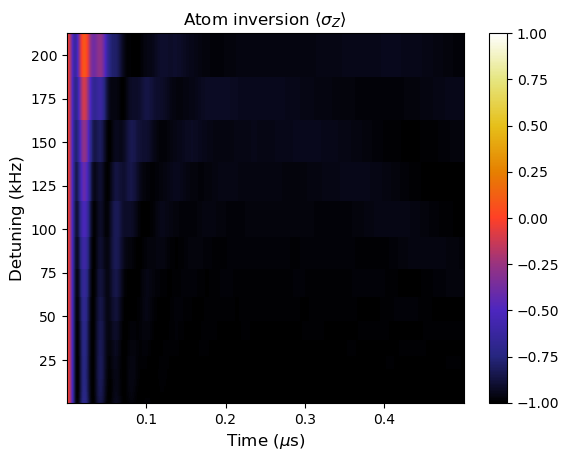

In [11]:
utils.plot_heat(results[0],detuning_values_1d[:20], np.rot90(results[1]), -1.0,1.0, 
                "Atom inversion $\langle\sigma_Z\\rangle$", "Time ($\mu$s)", "Detuning (kHz)")

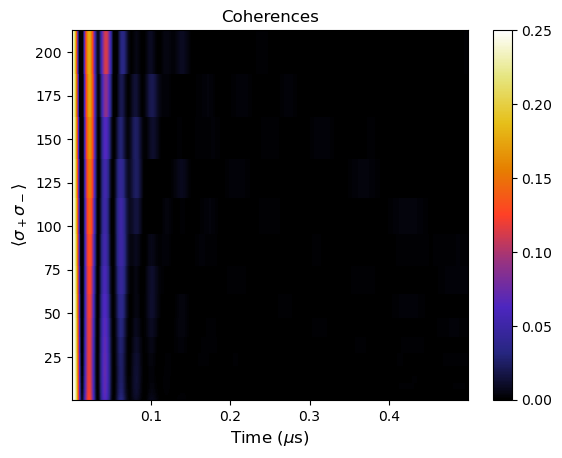

In [13]:
utils.plot_heat(results[0],detuning_values_1d, np.rot90(results[2]), 0,0.25, 
                "Coherences", "Time ($\mu$s)", "$\langle\sigma_+\sigma_-\\rangle$")

[[2 5]
 [1 4]
 [0 3]]


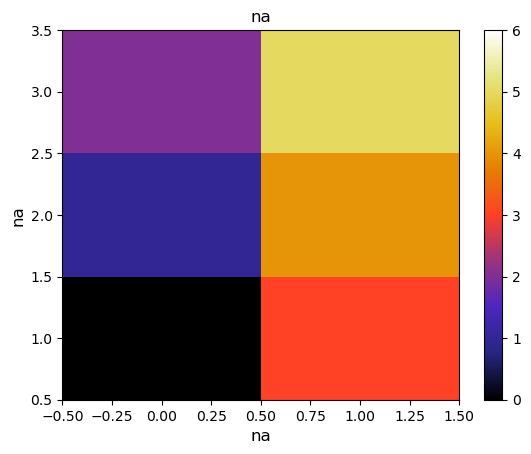

In [11]:

a = np.rot90(np.asarray([[0,1,2],[3,4,5]]))
print(a)
utils.plot_heat([0,1], [3,2,1], a, 0,6, "na", "na", "na")